### Distance Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start_date = '2019-12-29'
end_date = '2024-01-01'
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'COST', 'AMGN', 'AVGO', 'TXN', 'QCOM', 'GILD', 'SBUX'
]
price = pd.DataFrame()
for i in tickers :
    price = pd.concat([
        price, 
        yf.download(i, start=start_date, end=end_date)['Close']
    ], axis = 1)
price.columns = tickers
price.index = pd.to_datetime(price.index)
price = price.resample('W').last()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [2]:
price.dropna(inplace=True)

In [3]:
ret = price.pct_change().dropna()

In [4]:
ret

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
2020-01-12,0.043372,0.017148,0.049533,0.004368,0.038341,0.024110,-0.019301,-0.010498,-0.000666,-0.008110,0.009666,0.018887,-0.000881,-0.047646,0.016817,0.037233,-0.000615,0.014972
2020-01-19,0.027068,0.035701,0.035382,-0.009792,0.027539,0.029222,0.011198,0.040102,0.056025,0.050026,0.032275,0.025030,0.013557,0.031983,0.013077,0.062597,-0.031524,0.038376
2020-01-26,-0.001318,-0.012328,-0.009023,-0.001652,0.008101,0.004661,0.148826,-0.003468,-0.061263,0.011751,0.039715,0.019135,-0.065841,0.049257,-0.008960,-0.065270,0.002699,-0.016984
2020-02-02,-0.027646,0.031447,-0.022774,0.079006,-0.026415,-0.000655,-0.066306,-0.058956,-0.031397,-0.006297,-0.022851,-0.016070,-0.042289,-0.058148,-0.075621,-0.048411,0.000792,-0.078235
2020-02-09,0.033989,0.080244,0.032336,0.035127,0.043814,0.042576,0.032692,0.043507,0.035888,0.023588,0.062824,0.026545,0.061467,0.032999,0.066722,0.024733,0.089715,0.018743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03,0.006685,-0.007736,-0.035335,0.001976,0.069763,-0.011236,-0.005004,0.002275,-0.008690,-0.004015,-0.028818,0.008269,0.026332,-0.049925,0.010548,0.015029,0.030114,-0.034832
2023-12-10,0.023374,-0.000748,0.023737,0.002653,-0.011903,-0.004016,-0.023777,-0.001857,-0.002606,-0.017843,-0.025722,0.024369,-0.012222,0.015376,0.011726,0.025449,0.017643,-0.026109
2023-12-17,0.009504,-0.009353,-0.017705,0.017298,0.039362,-0.041524,0.081030,0.030798,0.056532,0.007967,0.040330,0.078653,0.023521,0.196378,0.073935,0.076408,0.016578,0.001449
2023-12-24,-0.020094,0.010385,0.067044,0.023005,0.009468,0.024064,0.039861,0.004411,-0.010791,0.004072,0.031140,0.019398,0.031621,-0.006869,-0.002372,0.002515,-0.008341,-0.015194


### 상관계수

Text(0.5, 1.0, 'Correlation')

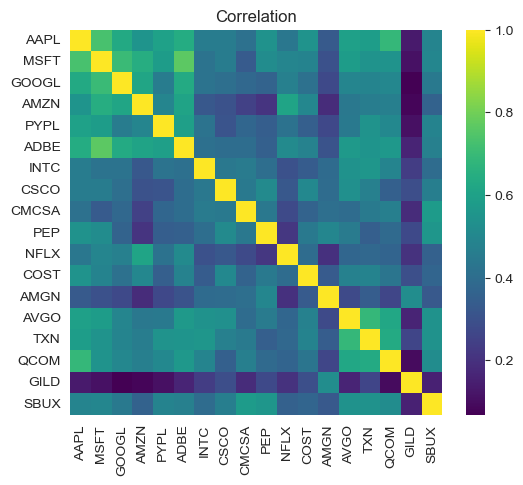

In [5]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    ret.corr(), annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation')

### 상관계수 기반 척도

$$
\begin{matrix}
d(x,y) & = & \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
& = & \sqrt{\sum_{i=1}^{n} x_i^2 - 2x_iy_i + y_i^2}  = \sqrt{T + T - 2T\sigma(x,y)} \\
& = & \sqrt{2T(1 - \rho(x,y))} = \sqrt{4T}d_{\rho}(x,y)
\end{matrix}


$$

In [6]:
def _corr_dist(x, y) :
    return np.sqrt(2 * len(x) * (1 - np.corrcoef(x, y)[0,1]))

def corr_dist(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _corr_dist(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [7]:
dist = corr_dist(ret)
dist

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,10.652704,12.375905,1.368563e+01,12.959817,12.236726,15.049176,1.506940e+01,1.565449e+01,13.774678,15.283318,13.721714,16.696963,12.984734,13.194656,11.381765,18.985793,14.578272
MSFT,10.652704,0.000000,11.202243,1.207795e+01,13.199223,9.845788,15.490949,1.506338e+01,1.667870e+01,14.141172,14.529697,14.643479,17.086911,13.231312,13.719064,13.741813,19.235559,14.499498
GOOGL,12.375905,11.202243,0.000000,1.263323e+01,15.055286,12.347605,15.470984,1.575016e+01,1.605284e+01,16.290708,14.868875,15.656048,17.399700,14.551601,14.570070,14.435809,19.689459,15.206561
AMZN,13.685632,12.077953,12.633226,2.149076e-07,14.556750,12.770436,16.785461,1.702532e+01,1.768477e+01,18.166106,12.672347,14.446444,18.453737,15.251280,14.977034,14.903629,19.535648,16.341613
PYPL,12.959817,13.199223,15.055286,1.455675e+01,0.000000,13.079992,15.511614,1.694124e+01,1.615977e+01,16.535014,15.547526,16.499451,17.444676,15.203228,13.757594,14.369989,19.292895,14.634541
ADBE,12.236726,9.845788,12.347605,1.277044e+01,13.079992,0.000000,15.709965,1.583410e+01,1.582997e+01,16.431066,14.281080,14.753315,16.995594,13.397188,13.676233,13.470102,18.684934,14.844058
INTC,15.049176,15.490949,15.470984,1.678546e+01,15.511614,15.709965,0.000000,1.527005e+01,1.510363e+01,15.786560,17.062082,16.619265,15.934915,13.802522,13.551563,14.590065,17.858190,15.877313
CSCO,15.069404,15.063376,15.750158,1.702532e+01,16.941235,15.834103,15.270046,3.039252e-07,1.521176e+01,14.254793,16.796042,14.384715,15.892709,13.960772,14.861615,16.422394,17.198167,14.954685
CMCSA,15.654489,16.678702,16.052844,1.768477e+01,16.159769,15.829971,15.103625,1.521176e+01,3.039252e-07,15.268316,17.318752,16.293406,15.712674,15.870307,15.143322,14.876111,18.458728,13.293778
PEP,13.774678,14.141172,16.290708,1.816611e+01,16.535014,16.431066,15.786560,1.425479e+01,1.526832e+01,0.000000,18.047379,15.190836,14.493654,15.110938,16.480683,15.983944,17.384209,13.541254


Text(0.5, 1.0, 'Correlation based Distance')

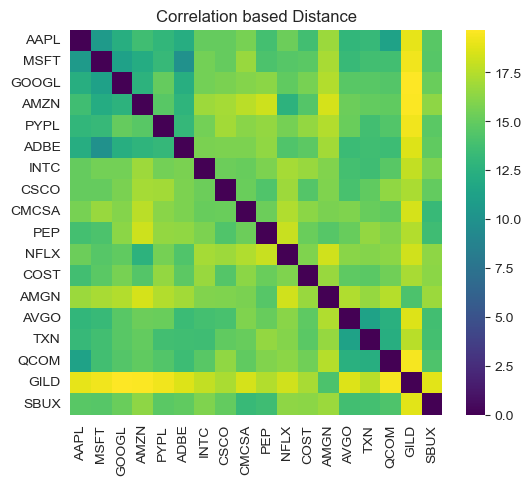

In [8]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    dist, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation based Distance')

#### Jensen-Shannon Divergence

$$
D_{KL}(P||Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

In [9]:
from scipy.special import rel_entr
from scipy.stats import gaussian_kde

def _js_divergence(x, y) :
    kde1, kde2 = gaussian_kde(x), gaussian_kde(y)
    estimate = np.linspace(
        min(np.min(x), np.min(y)), 
        max(np.max(x), np.max(y)), 
        len(x)
    )
    pdf1, pdf2 = kde1(estimate), kde2(estimate)
    m = 0.5 * (pdf1 + pdf2)
    return 0.5 * np.sum(rel_entr(pdf1, m)) + 0.5 * np.sum(rel_entr(pdf2, m))

def js_divergence(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _js_divergence(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [10]:
jsd = js_divergence(ret)
jsd

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,1.412595,2.806275,3.677673,12.757864,5.220914,7.691632,5.401563,4.641874,25.151077,6.189577,5.389844,5.869061,1.895495,3.365325,6.927551,9.141076,2.446664
MSFT,1.412595,0.000000,4.634577,7.092032,18.124008,8.411908,11.467120,4.135280,4.287866,21.242215,8.629068,3.707102,2.729430,4.178991,2.033612,10.526735,7.467098,3.688039
GOOGL,2.806275,4.634577,0.000000,1.103723,10.156481,3.823925,3.879667,10.789413,7.790604,32.902183,3.749555,11.516995,10.424808,3.306863,5.138493,4.303127,14.840616,2.230436
AMZN,3.677673,7.092032,1.103723,0.000000,6.326490,2.146939,1.629839,12.751194,9.170182,37.655976,2.364811,14.143039,14.228541,3.222962,8.816581,3.031607,17.788007,3.852911
PYPL,12.757864,18.124008,10.156481,6.326490,0.000000,4.177776,3.914217,22.783405,19.860232,46.148830,2.963886,24.530161,25.736661,8.673853,19.212201,3.034859,27.483435,11.163315
ADBE,5.220914,8.411908,3.823925,2.146939,4.177776,0.000000,3.327047,13.447952,11.895736,38.434057,2.013589,15.427972,15.281728,3.835267,9.671218,2.385356,20.174442,6.315961
INTC,7.691632,11.467120,3.879667,1.629839,3.914217,3.327047,0.000000,17.086831,13.999344,43.478334,2.296920,19.561335,19.833106,5.942061,13.406381,2.375759,21.825920,5.905881
CSCO,5.401563,4.135280,10.789413,12.751194,22.783405,13.447952,17.086831,0.000000,1.460027,12.325235,12.512316,2.951037,3.282320,7.328795,6.337953,15.740052,6.143863,6.516156
CMCSA,4.641874,4.287866,7.790604,9.170182,19.860232,11.895736,13.999344,1.460027,0.000000,15.206415,11.007040,3.984186,4.450364,6.446393,6.629998,13.751741,6.917380,4.929804
PEP,25.151077,21.242215,32.902183,37.655976,46.148830,38.434057,43.478334,12.325235,15.206415,0.000000,28.511417,12.042909,13.778749,26.092190,23.513971,38.240920,11.360243,23.102727


Text(0.5, 1.0, 'Jensen-Shannon Divergence')

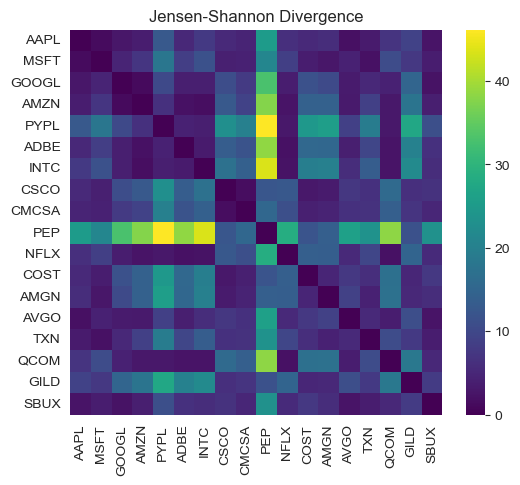

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    jsd, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Jensen-Shannon Divergence')

#### Variational Information

In [12]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

def num_bins(nObs, corr = None) :
    if corr is None :
        z = (8 + 324 * nObs + 12 * (36 * nObs + 729 * nObs ** 2) ** 0.5) ** (1/3)
        b = round(z / 6 + 2 / (3 * z) + 1 / 3)
    else :
        b = round(2 ** 0.5 * (1 + (1 + 24 * nObs * (1 - corr ** 2)) ** 0.5) ** 0.5)
    return int(b)

def _var_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
    hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
    v_xy = hx + hy - (2 * i_xy)
    if norm :
        h_xy = hx + hy - i_xy
        v_xy /= h_xy
    return v_xy

In [13]:
def var_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _var_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [14]:
vi = var_info(ret)
vi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,2.605469e+00,2.933093e+00,2.918958e+00,2.799019e+00,2.597017e+00,3.118765e+00,3.014418e+00,3.059599e+00,2.566364e+00,2.726230e+00,2.861802,3.231470e+00,2.775391e+00,3.092048e+00,2.573775e+00,3.209134e+00,2.934139e+00
MSFT,2.605469,-4.440892e-16,2.908115e+00,2.976570e+00,2.971570e+00,2.330242e+00,3.275685e+00,3.186742e+00,3.188610e+00,2.688879e+00,2.769355e+00,2.933260,3.339839e+00,2.921980e+00,3.131569e+00,2.948415e+00,3.330795e+00,3.023939e+00
GOOGL,2.933093,2.908115e+00,8.881784e-16,3.117048e+00,3.145648e+00,2.982427e+00,3.256169e+00,3.341595e+00,3.324172e+00,2.985134e+00,2.880677e+00,3.169538,3.500137e+00,3.066964e+00,3.298552e+00,3.070305e+00,3.368650e+00,3.242551e+00
AMZN,2.918958,2.976570e+00,3.117048e+00,4.440892e-16,2.852386e+00,2.797572e+00,3.413896e+00,3.372619e+00,3.321211e+00,2.944853e+00,2.639687e+00,2.871737,3.468702e+00,3.003321e+00,3.234746e+00,3.019306e+00,3.337703e+00,3.194149e+00
PYPL,2.799019,2.971570e+00,3.145648e+00,2.852386e+00,-2.220446e-16,2.759469e+00,3.226364e+00,3.232394e+00,3.185619e+00,2.869396e+00,2.677773e+00,3.112318,3.465031e+00,2.912653e+00,3.061833e+00,2.768139e+00,3.167829e+00,2.954430e+00
ADBE,2.597017,2.330242e+00,2.982427e+00,2.797572e+00,2.759469e+00,6.661338e-16,3.077030e+00,3.008134e+00,2.916267e+00,2.709124e+00,2.505515e+00,2.734233,3.317926e+00,2.617933e+00,2.927128e+00,2.811802e+00,3.214913e+00,2.789990e+00
INTC,3.118765,3.275685e+00,3.256169e+00,3.413896e+00,3.226364e+00,3.077030e+00,6.661338e-16,3.221904e+00,3.062927e+00,2.833579e+00,3.168035e+00,3.317305,3.275987e+00,2.927998e+00,3.224040e+00,3.099813e+00,3.366854e+00,3.124895e+00
CSCO,3.014418,3.186742e+00,3.341595e+00,3.372619e+00,3.232394e+00,3.008134e+00,3.221904e+00,2.220446e-16,3.139995e+00,2.652855e+00,2.957448e+00,2.920168,3.208467e+00,2.783380e+00,3.123830e+00,3.186198e+00,3.260437e+00,3.055996e+00
CMCSA,3.059599,3.188610e+00,3.324172e+00,3.321211e+00,3.185619e+00,2.916267e+00,3.062927e+00,3.139995e+00,2.220446e-16,2.669470e+00,2.970115e+00,3.146544,3.211095e+00,2.876264e+00,3.147900e+00,2.933215e+00,3.276229e+00,2.900838e+00
PEP,2.566364,2.688879e+00,2.985134e+00,2.944853e+00,2.869396e+00,2.709124e+00,2.833579e+00,2.652855e+00,2.669470e+00,4.440892e-16,2.636823e+00,2.473999,2.794609e+00,2.524718e+00,3.042256e+00,2.731335e+00,2.708433e+00,2.560731e+00


Text(0.5, 1.0, 'Variational Information')

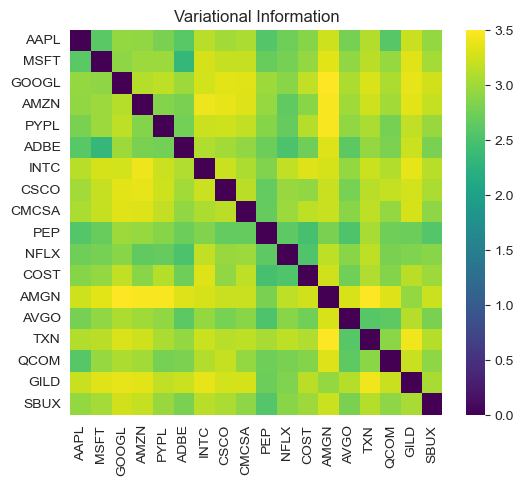

In [15]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    vi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Variational Information')

#### Mutual Information

In [16]:
def _mutual_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    if norm :
        hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
        hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
        i_xy /= (hx + hy)
    return i_xy

def mutual_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _mutual_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [17]:
mi = mutual_info(ret)
mi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.617242,0.431718,0.403431,0.373247,0.364307,0.384477,0.284456,0.288578,0.231114,0.226650,0.194389,0.259552,0.307708,0.300589,0.337493,0.339658,0.171515,0.263085
MSFT,0.431718,0.666278,0.399835,0.344913,0.343301,0.526248,0.271267,0.267687,0.307171,0.230663,0.238096,0.289093,0.320758,0.292565,0.383002,0.319334,0.177919,0.283455
GOOGL,0.403431,0.399835,0.672620,0.406004,0.322795,0.323575,0.347557,0.256793,0.299574,0.206315,0.248968,0.237486,0.300794,0.286605,0.366044,0.324921,0.219176,0.240682
AMZN,0.373247,0.344913,0.406004,0.668489,0.432175,0.378751,0.322769,0.292305,0.272894,0.198295,0.332212,0.349136,0.288351,0.281175,0.360696,0.313169,0.206489,0.290735
PYPL,0.364307,0.343301,0.322795,0.432175,0.693101,0.328893,0.256299,0.276709,0.254982,0.150315,0.244259,0.244996,0.204478,0.257600,0.378242,0.369843,0.205718,0.278581
ADBE,0.384477,0.526248,0.323575,0.378751,0.328893,0.582492,0.250135,0.236532,0.247591,0.185648,0.249558,0.268147,0.233227,0.324129,0.364764,0.267182,0.137373,0.279971
INTC,0.284456,0.271267,0.347557,0.322769,0.256299,0.250135,0.692407,0.290500,0.335114,0.198707,0.190480,0.243575,0.310880,0.329950,0.377161,0.284029,0.207278,0.273372
CSCO,0.288578,0.267687,0.256793,0.292305,0.276709,0.236532,0.290500,0.562335,0.248529,0.241018,0.244671,0.287981,0.296588,0.354207,0.379215,0.266293,0.209384,0.259770
CMCSA,0.231114,0.307171,0.299574,0.272894,0.254982,0.247591,0.335114,0.248529,0.562335,0.197836,0.193223,0.232739,0.260400,0.272892,0.332306,0.284402,0.156373,0.302474
PEP,0.226650,0.230663,0.206315,0.198295,0.150315,0.185648,0.198707,0.241018,0.197836,0.551523,0.097091,0.225111,0.217562,0.197583,0.191531,0.185831,0.177493,0.221447


Text(0.5, 1.0, 'Mutual Information')

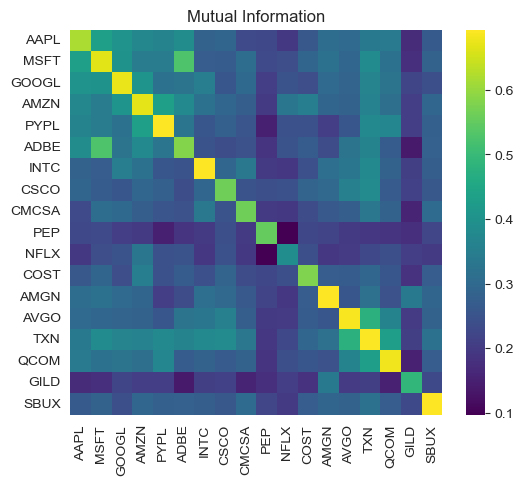

In [18]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    mi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Mutual Information')

In [19]:
from scipy.optimize import minimize

def markowitz_optimization(returns, distance_matrix, target_return):
    n = distance_matrix.shape[0]
    initial_weights = np.ones(n) / n

    def portfolio_risk(weights):
        weighted_distance = np.dot(weights.T, np.dot(distance_matrix, weights))
        return np.sqrt(weighted_distance)

    def target_return_constraint(weights):
        return target_return - np.dot(weights, returns)

    def weight_sum_constraint(weights):
        return np.sum(weights) - 1

    constraints = [{'type': 'eq', 'fun': weight_sum_constraint},
                   {'type': 'eq', 'fun': target_return_constraint}]

    bounds = tuple((0, 1) for _ in range(n))

    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    result = pd.Series(result.x, index = returns.index)

    return result

In [20]:
def generate_random_portfolios(returns, distance_matrix, num_portfolios=5000):
    n = returns.shape[1]  
    mean_returns = returns.mean()  
    portfolio_returns = []
    portfolio_volatility = []
    for _ in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_returns.append(portfolio_return)
        
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        portfolio_volatility.append(portfolio_std)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatility
    })
    
    return portfolios

def find_optimal_portfolio(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def neg_sharpe_ratio(weights):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        return -sharpe_ratio 

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index = returns.columns, name = 'weight')
    optimal_return = np.dot(optimal_weights, mean_returns)
    return optimal_weights, optimal_return

In [21]:
portfolio_mi = generate_random_portfolios(ret, mi, num_portfolios = 5000)
optimal_weight_mi, optimal_return_mi = find_optimal_portfolio(ret, mi)

In [22]:
optimal_return_mi

0.005860162280396224

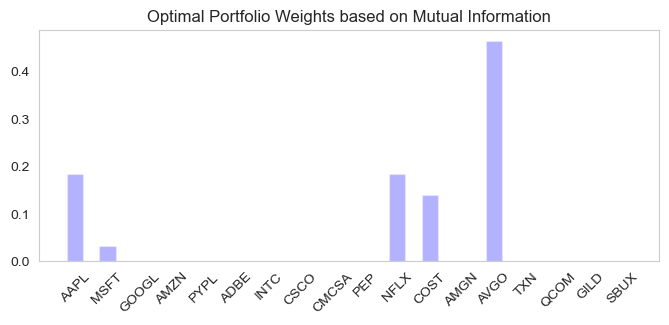

In [23]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_mi.index, optimal_weight_mi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Mutual Information')
plt.show()

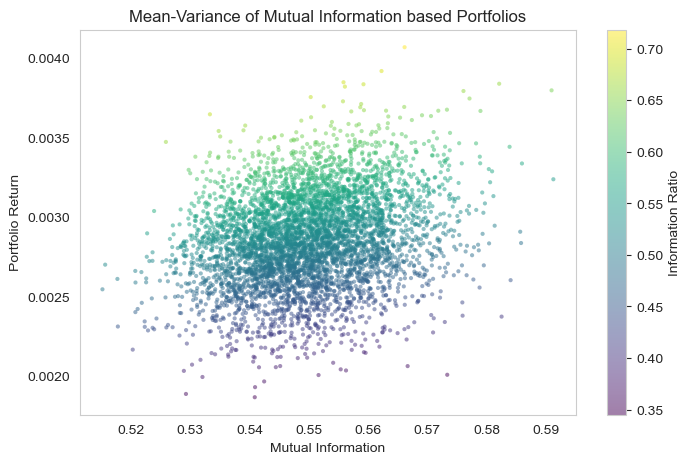

In [24]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_mi['Volatility'], 
    portfolio_mi['Return'], 
    c = (portfolio_mi['Return'] / portfolio_mi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Mutual Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Mutual Information based Portfolios')
plt.show()

In [25]:
portfolio_vi = generate_random_portfolios(ret, vi, num_portfolios = 5000)
optimal_weight_vi, optimal_return_vi = find_optimal_portfolio(ret, vi)

In [26]:
optimal_return_vi

0.00722790526078655

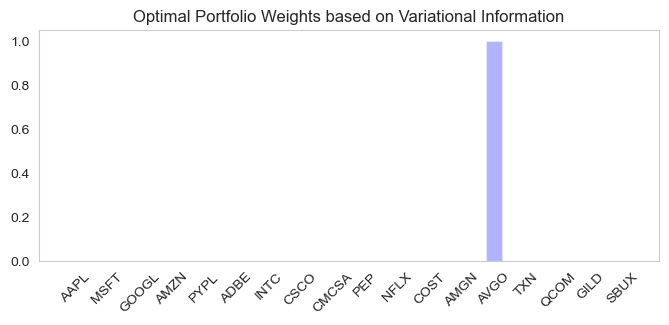

In [27]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_vi.index, optimal_weight_vi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Variational Information')
plt.show()

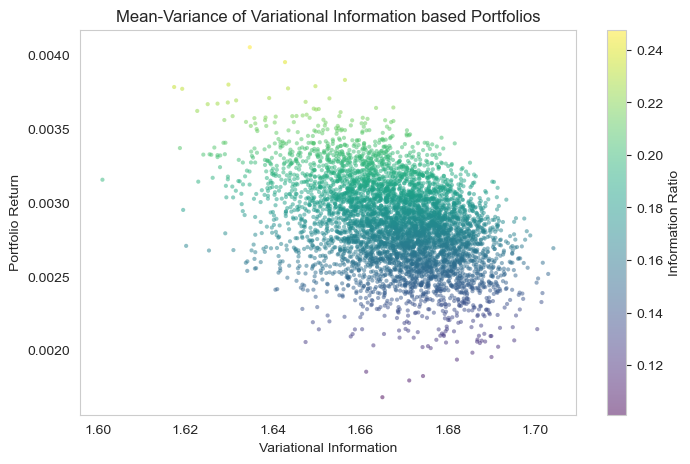

In [39]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_vi['Volatility'], 
    portfolio_vi['Return'], 
    c = (portfolio_vi['Return'] / portfolio_vi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Variational Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Variational Information based Portfolios')
plt.show()

In [29]:
portfolio_jsd = generate_random_portfolios(ret, jsd, num_portfolios = 5000)
optimal_weight_jsd, optimal_return_jsd = find_optimal_portfolio(ret, jsd)

In [30]:
optimal_return_jsd

0.007227949024052381

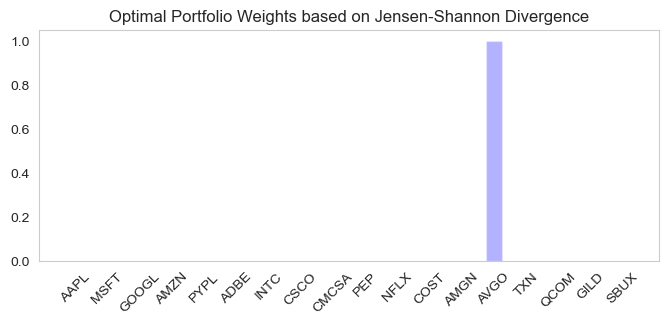

In [31]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_jsd.index, optimal_weight_jsd, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

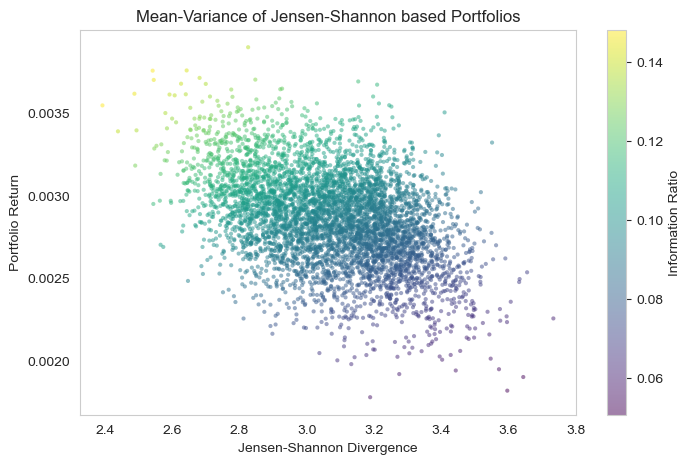

In [40]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_jsd['Volatility'], 
    portfolio_jsd['Return'], 
    c = (portfolio_jsd['Return'] / portfolio_jsd['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Jensen-Shannon based Portfolios')
plt.show()

In [33]:
portfolio_corr_dist = generate_random_portfolios(ret, dist, num_portfolios = 5000)

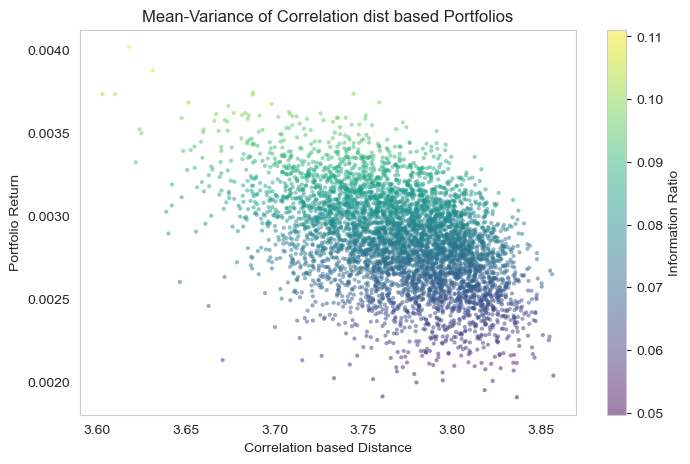

In [41]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr_dist['Volatility'], 
    portfolio_corr_dist['Return'], 
    c = (portfolio_corr_dist['Return'] / portfolio_corr_dist['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation based Distance')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation dist based Portfolios')
plt.show()

In [35]:
portfolio_corr = generate_random_portfolios(ret, ret.corr(), num_portfolios = 5000)
optimal_weight_corr_dist, optimal_return_corr_dist = find_optimal_portfolio(ret, ret.corr())

In [36]:
optimal_return_corr_dist

0.006253271088703925

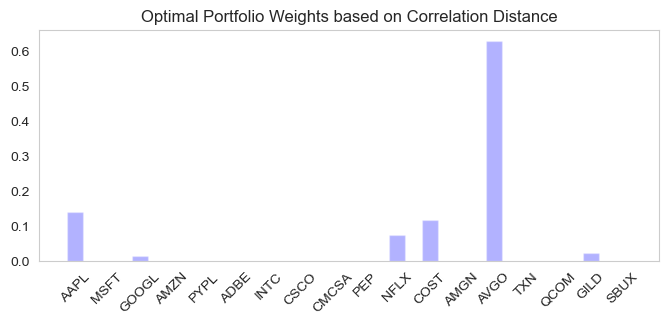

In [37]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_corr_dist.index, optimal_weight_corr_dist, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Correlation Distance')
plt.show()

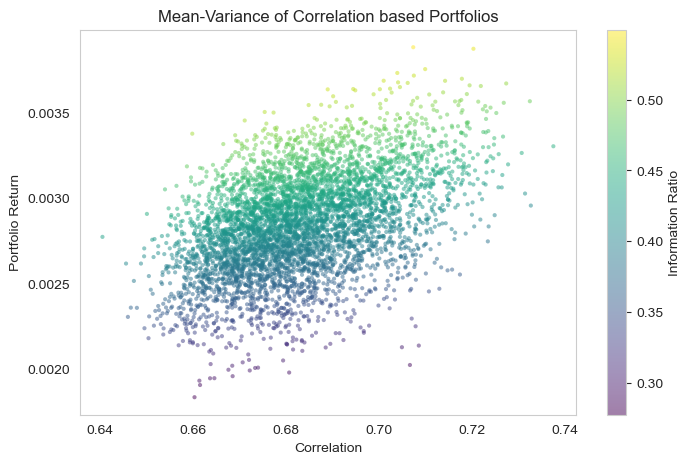

In [38]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr['Volatility'], 
    portfolio_corr['Return'], 
    c = (portfolio_corr['Return'] / portfolio_corr['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation based Portfolios')
plt.show()

In [42]:
return_comparison = [optimal_return_corr_dist, optimal_return_jsd, optimal_return_vi, optimal_return_mi]
weight_comparison = pd.DataFrame(
    [optimal_weight_corr_dist, optimal_weight_jsd, optimal_weight_vi, optimal_weight_mi], 
    index = ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']
)

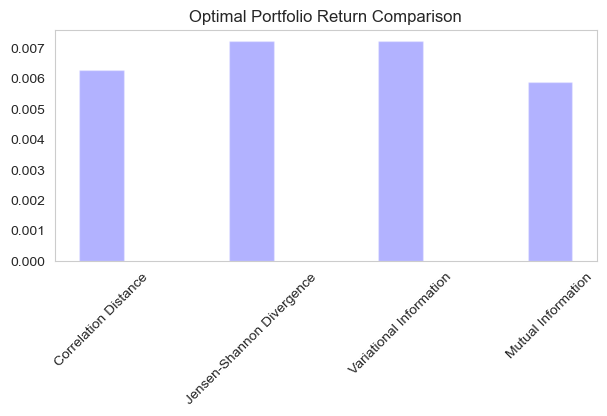

In [48]:
plt.figure(figsize = (7, 3))
plt.bar(
    ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'], 
    return_comparison, 
    color = 'b', 
    alpha = 0.3, 
    label = 'Optimal Portfolio', 
    width = 0.3
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Return Comparison')
plt.show()

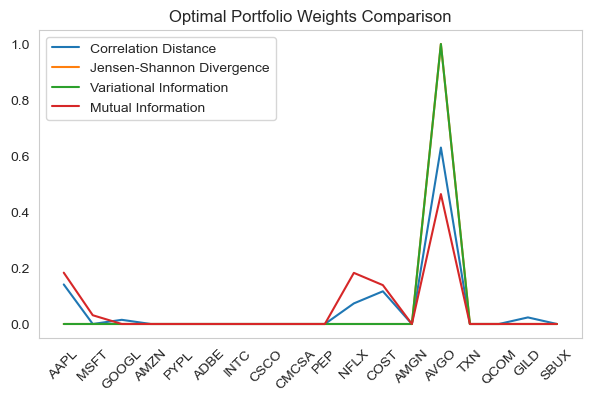

In [58]:
plt.figure(figsize = (7, 4))
plt.plot(
    weight_comparison.T
)
plt.legend([
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
])
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights Comparison')
plt.show()